This activity allows you to put you neutronics knowledge to the test

We are going to simulate a tokamak where you get to decide the materials.

The goal is to:

- maximize the Tritium Breeding Ratio
- minimize the heating on the center colum
- maximize the heat in the blanket

I recommend plotting the cross sections before you make your choices.

The [example](https://github.com/fusion-energy/neutronics-workshop/blob/main/tasks/task_01_cross_sections/3_material_xs_plot.ipynb) for plotting cross sections might be useful.

In [9]:
import openmc
import matplotlib.pyplot as plt
from openmc_source_plotter import plot_source_energy, plot_source_position, plot_source_direction
from pathlib import Path

openmc.config['cross_sections'] = Path.home() / 'nuclear_data' / 'cross_sections.xml'

# Task 1 - enter the names of materials

In [23]:
# options for coolant

water = openmc.Material(name='water')
water.add_element('H', 2)
water.add_element('O', 1)
water.set_density('g/cm3', 1)

helium = openmc.Material(name='helium')
helium.add_element('He', 1)
helium.set_density('g/cm3', 0.0014)

super_critical_co2 = openmc.Material(name='super critical co2')
super_critical_co2.add_element('C', 1)
super_critical_co2.add_element('O', 2)
super_critical_co2.set_density('g/cm3', 0.001)


# options for first wall

tungsten = openmc.Material(name='tungsten')
tungsten.add_element('W', 1, percent_type='wo')
tungsten.set_density('g/cm3', 19.2)

steel = openmc.Material(name='steel')
steel.add_element('Fe', 0.95, percent_type='wo')
steel.add_element('C', 0.05, percent_type='wo')
steel.set_density('g/cm3', 7.8)

silicon_carbide = openmc.Material(name='SiC')
silicon_carbide.add_element('Si', 1)
silicon_carbide.add_element('C', 1)
silicon_carbide.set_density('g/cm3', 3.21)

zirconium = openmc.Material(name='Zr')
zirconium.add_element('Zr', 1, percent_type='wo')
zirconium.set_density('g/cm3', 6.49)

# options for reflector

beryllium = openmc.Material(name='Be')
beryllium.add_element('Be', 1, percent_type='wo')
beryllium.set_density('g/cm3', 1.85)

tungsten = openmc.Material(name='tungsten')
tungsten.add_element('W', 1, percent_type='wo')
tungsten.set_density('g/cm3', 19.2)

graphite = openmc.Material(name='graphite')
graphite.add_element('C', 1, percent_type='wo')
graphite.set_density('g/cm3', 2.2)

# options for breeder

# note you can change the enrichment
lithium_lead = openmc.Material(name='LiPb')
lithium_lead.add_element('Pb', 84.2, percent_type='ao')
lithium_lead.add_element('Li', 15.8, percent_type='ao', enrichment=90.0, enrichment_target='Li6', enrichment_type='ao')
lithium_lead.set_density('g/cm3', 9.5)

# note you can change the enrichment
lithium_orthosilicate = openmc.Material(name='LiOr')
lithium_orthosilicate.add_element('Si', 4, percent_type='ao')
lithium_orthosilicate.add_element('O', 1, percent_type='ao')
lithium_orthosilicate.add_element('Li', 4, percent_type='ao', enrichment=50.0, enrichment_target='Li6', enrichment_type='ao')
lithium_orthosilicate.set_density('g/cm3', 2.2)

# note you can change the enrichment
lithium_titanate = openmc.Material(name='LiTi')
lithium_titanate.add_element('O', 12, percent_type='ao')
lithium_titanate.add_element('Ti', 5, percent_type='ao')
lithium_titanate.add_element('Li', 4, percent_type='ao', enrichment=40.0, enrichment_target='Li6', enrichment_type='ao')
lithium_titanate.set_density('g/cm3', 2.4)

# note you can change the enrichment
liquid_lithium = openmc.Material(name='Li(li)')
liquid_lithium.add_element('Li', 1, percent_type='ao', enrichment=60, enrichment_target='Li6', enrichment_type='ao')
liquid_lithium.set_density('g/cm3', 0.5)


# conductor material

mat_conductor = openmc.Material(name='mat_conductor')
mat_conductor.add_element('Nb', 1, percent_type='ao')
mat_conductor.add_element('Sn', 3, percent_type='ao')
mat_conductor.set_density('g/cm3', 8.96)



In [243]:
# note you can change the enrichment
liquid_lithium = openmc.Material(name='Li(li)')
liquid_lithium.add_element('Li', 1, percent_type='ao', enrichment=6, enrichment_target='Li6', enrichment_type='ao')
liquid_lithium.set_density('g/cm3', 0.5)


# Task 2 - plot the tritium production cross sections of all the breeder options 

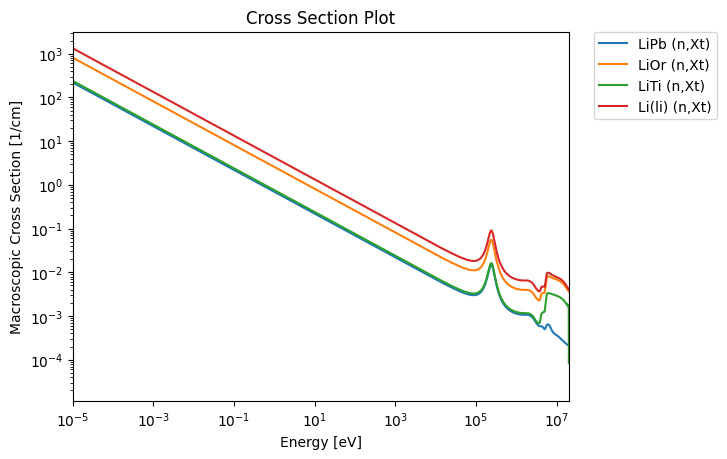

In [24]:
# your code goes here
fig, ax = plt.subplots()
fig = openmc.plotter.plot_xs(
    axis=ax,
    reactions = {
        lithium_lead: ['(n,Xt)'],
        lithium_orthosilicate: ['(n,Xt)'],
        lithium_titanate: ['(n,Xt)'],
        liquid_lithium: ['(n,Xt)'],
    }
)
ax.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
# modify the axis afterwards to make the data clearer
# ax.set_xscale('linear')
# ax.set_yscale('linear')
# ax.set_xlim(0, 15e6)  # set the x axis limits from 0 to 15MeV

plt.show()

# Task 3 - plot the absorption of all the coolants and first wall options

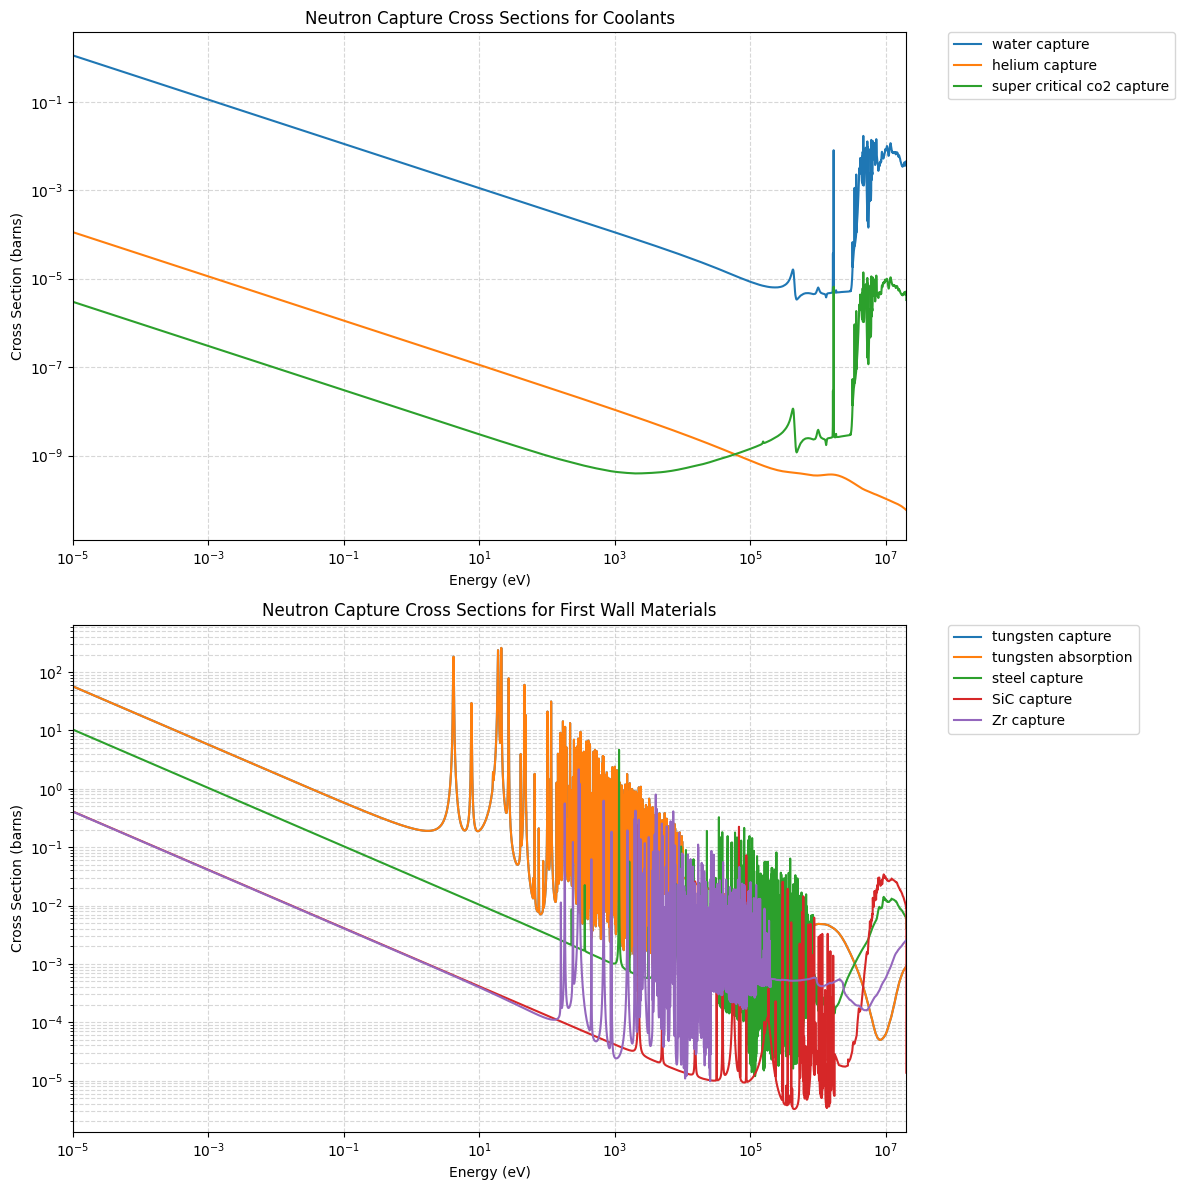

In [12]:
# your code goes here
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

# Plot for coolants
fig = openmc.plotter.plot_xs(
    axis=ax1,
    reactions={
        water: ['capture'],
        helium: ['capture'],
        super_critical_co2: ['capture']
    }
)

ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Cross Section (barns)')
ax1.set_title('Neutron Capture Cross Sections for Coolants')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)

# Plot for first wall materials
fig = openmc.plotter.plot_xs(
    axis=ax2,
    reactions={
        tungsten: ['capture', 'absorption'],
        steel: ['capture'],
        silicon_carbide: ['capture'],
        zirconium: ['capture']
    }
)

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Cross Section (barns)')
ax2.set_title('Neutron Capture Cross Sections for First Wall Materials')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()

# Task V3 - Plot scattering Cross sections of Reflectors

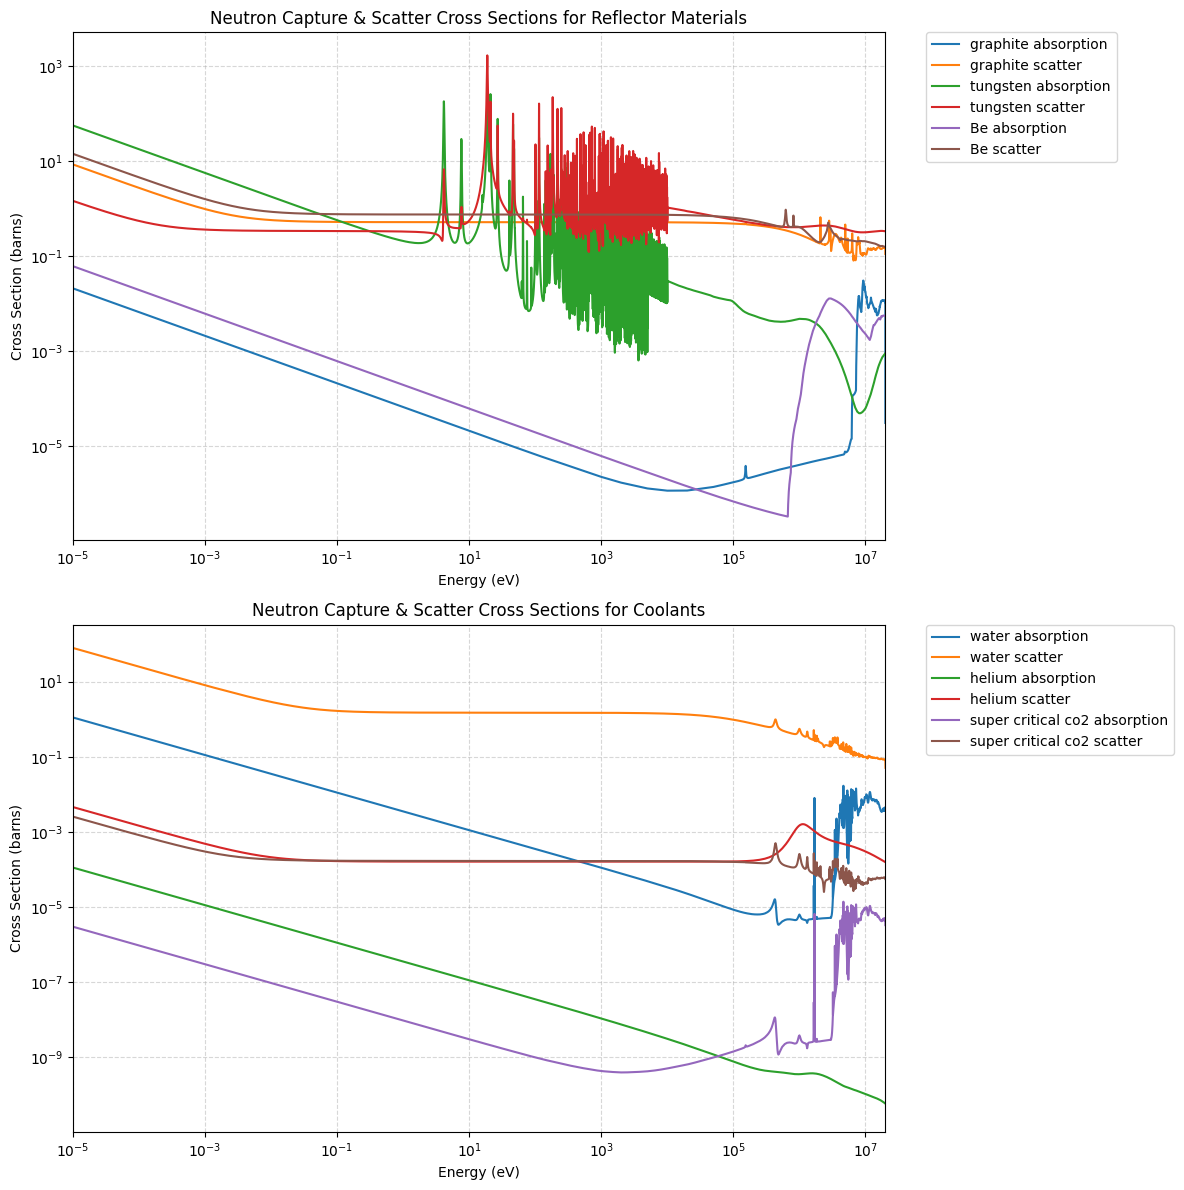

In [31]:
# your code goes here
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))


# Plot for reflector materials
fig = openmc.plotter.plot_xs(
    axis=ax1,
    reactions={
        graphite: ['absorption', 'scatter'],
        tungsten: ['absorption', 'scatter'],
        beryllium: ['absorption', 'scatter']
    }
)

ax1.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax1.set_xlabel('Energy (eV)')
ax1.set_ylabel('Cross Section (barns)')
ax1.set_title('Neutron Capture & Scatter Cross Sections for Reflector Materials')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.grid(True, which='both', linestyle='--', alpha=0.5)


# Plot for coolants
fig = openmc.plotter.plot_xs(
    axis=ax2,
    reactions={
        water: ['absorption', 'scatter'],
        helium: ['absorption', 'scatter'],
        super_critical_co2: ['absorption', 'scatter']
    }
)

ax2.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0)
ax2.set_xlabel('Energy (eV)')
ax2.set_ylabel('Cross Section (barns)')
ax2.set_title('Neutron Capture & Scatter Cross Sections for Coolants')
ax2.set_xscale('log')
ax2.set_yscale('log')
ax2.grid(True, which='both', linestyle='--', alpha=0.5)


plt.tight_layout()
plt.show()

# Task 4 - select your materials

In [244]:
mat_breeder = liquid_lithium
# NB Li6 7% was swept and is optimal. Too high and not enough neutron multiplication, too low and too much input energy leeching.

mat_coolant = helium
# Neutronically helium is best due to low absorption. However it does have poor heat transfer properties (low density)

mat_firstwall = zirconium
# zirconium seems to be optimal, only has absorption peaks for much lower energies

mat_reflector = beryllium
# beryllium seems to be optimal, similar to graphite. still tiny absorption but slightly higher reflectivity.

# put in your chosen material option
my_materials = openmc.Materials([mat_conductor, mat_coolant, mat_firstwall, mat_breeder, mat_reflector])

# Task 3 - Fill the cells with the materials

In [245]:

# surfaces
central_column_surface_outer = openmc.ZCylinder(r=100)
central_column_surface_mid = openmc.ZCylinder(r=95)
central_column_surface_inner = openmc.ZCylinder(r=90)
inner_sphere_surface = openmc.Sphere(r=495)
middle_sphere_surface = openmc.Sphere(r=500)
outer_sphere_surface = openmc.Sphere(r=505)
outer_outer_sphere_surface = openmc.Sphere(r=600)
edge_of_simulation_surface = openmc.Sphere(r=700, boundary_type='vacuum')

# regions
central_column_region = -central_column_surface_inner & -edge_of_simulation_surface
central_column_coolant_region = +central_column_surface_inner & -central_column_surface_mid & -edge_of_simulation_surface
central_column_fw_region = +central_column_surface_mid & -central_column_surface_outer & -edge_of_simulation_surface
inner_vessel_region = +central_column_surface_outer & -inner_sphere_surface
blanket_fw_region = -middle_sphere_surface & +inner_sphere_surface & +central_column_surface_outer
blanket_coolant_region = +middle_sphere_surface & -outer_sphere_surface & +central_column_surface_outer
blanket_breeder_region = +outer_sphere_surface & -outer_outer_sphere_surface & +central_column_surface_outer
blanket_reflector_region = +outer_outer_sphere_surface & -edge_of_simulation_surface & +central_column_surface_outer

# cells
central_column_cell = openmc.Cell(region=central_column_region, fill=mat_conductor)
central_column_coolant_cell = openmc.Cell(region=central_column_coolant_region, fill=mat_coolant)
central_column_fw_cell = openmc.Cell(region=central_column_fw_region, fill=mat_firstwall)
inner_vessel_cell = openmc.Cell(region=inner_vessel_region)
blanket_fw_cell = openmc.Cell(region=blanket_fw_region, fill=mat_firstwall)
blanket_coolant_cell = openmc.Cell(region=blanket_coolant_region, fill=mat_coolant)
blanket_breeder_cell  = openmc.Cell(region=blanket_breeder_region, fill=mat_breeder)
blanket_reflector_cell = openmc.Cell(region=blanket_reflector_region, fill=mat_reflector)
my_geometry = openmc.Geometry([
    central_column_cell,
    central_column_coolant_cell,
    central_column_fw_cell,
    inner_vessel_cell,
    blanket_fw_cell,
    blanket_coolant_cell,
    blanket_breeder_cell,
    blanket_reflector_cell,
])


# task 4 - plot the geometry

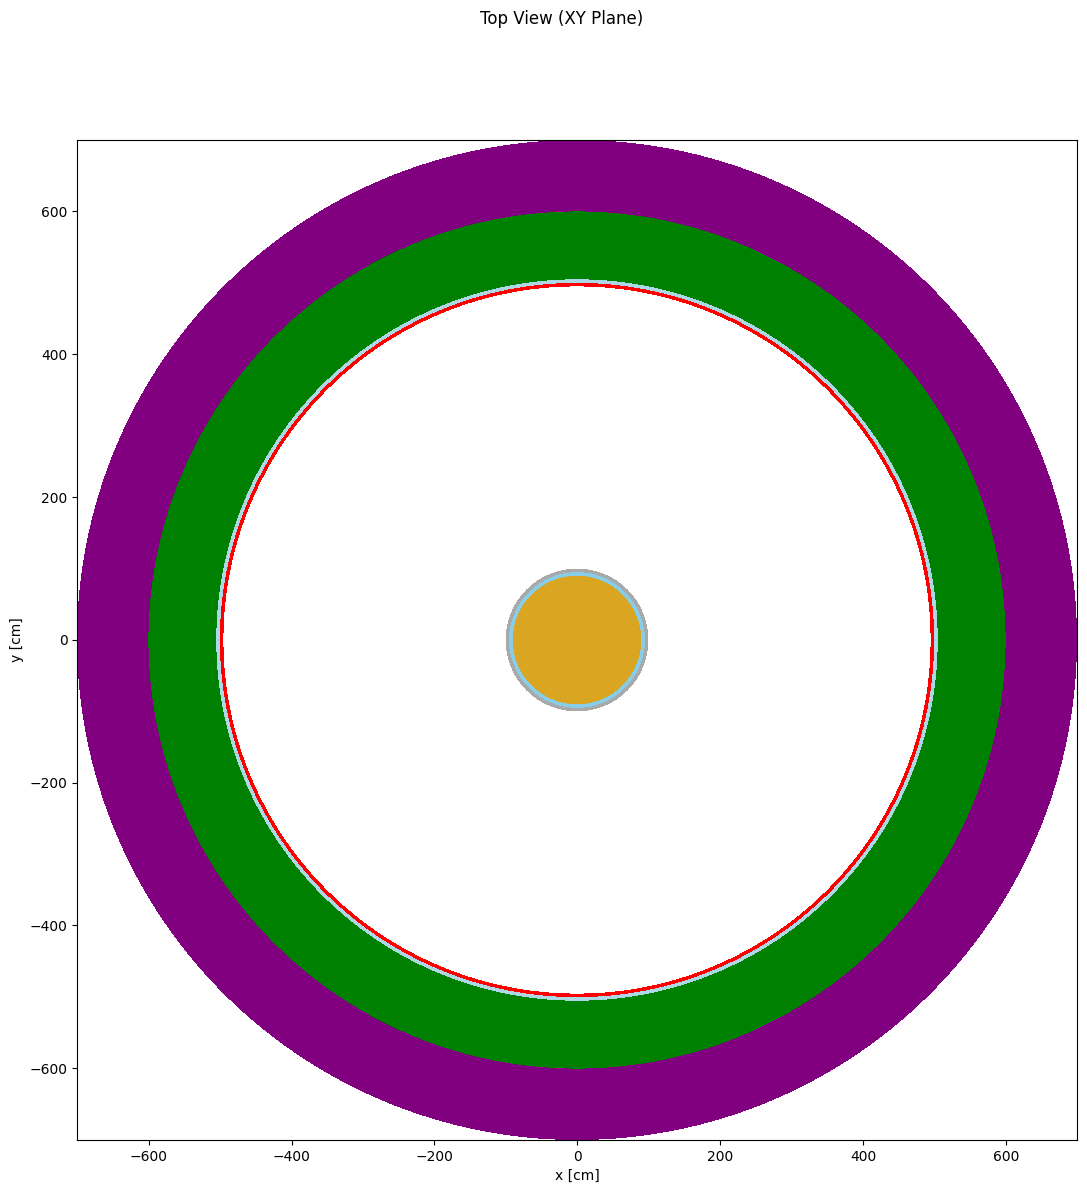

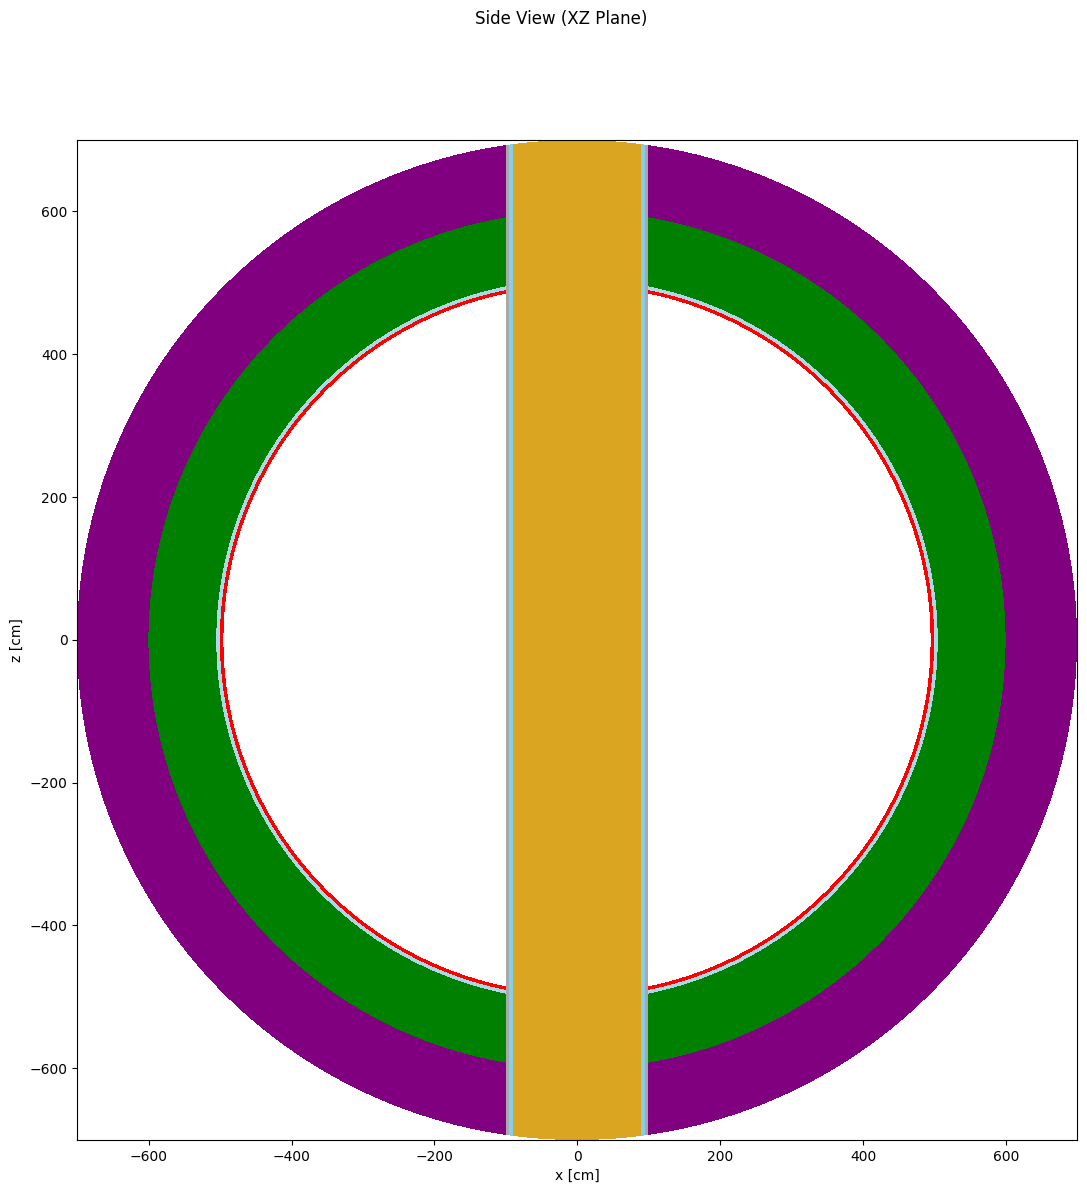

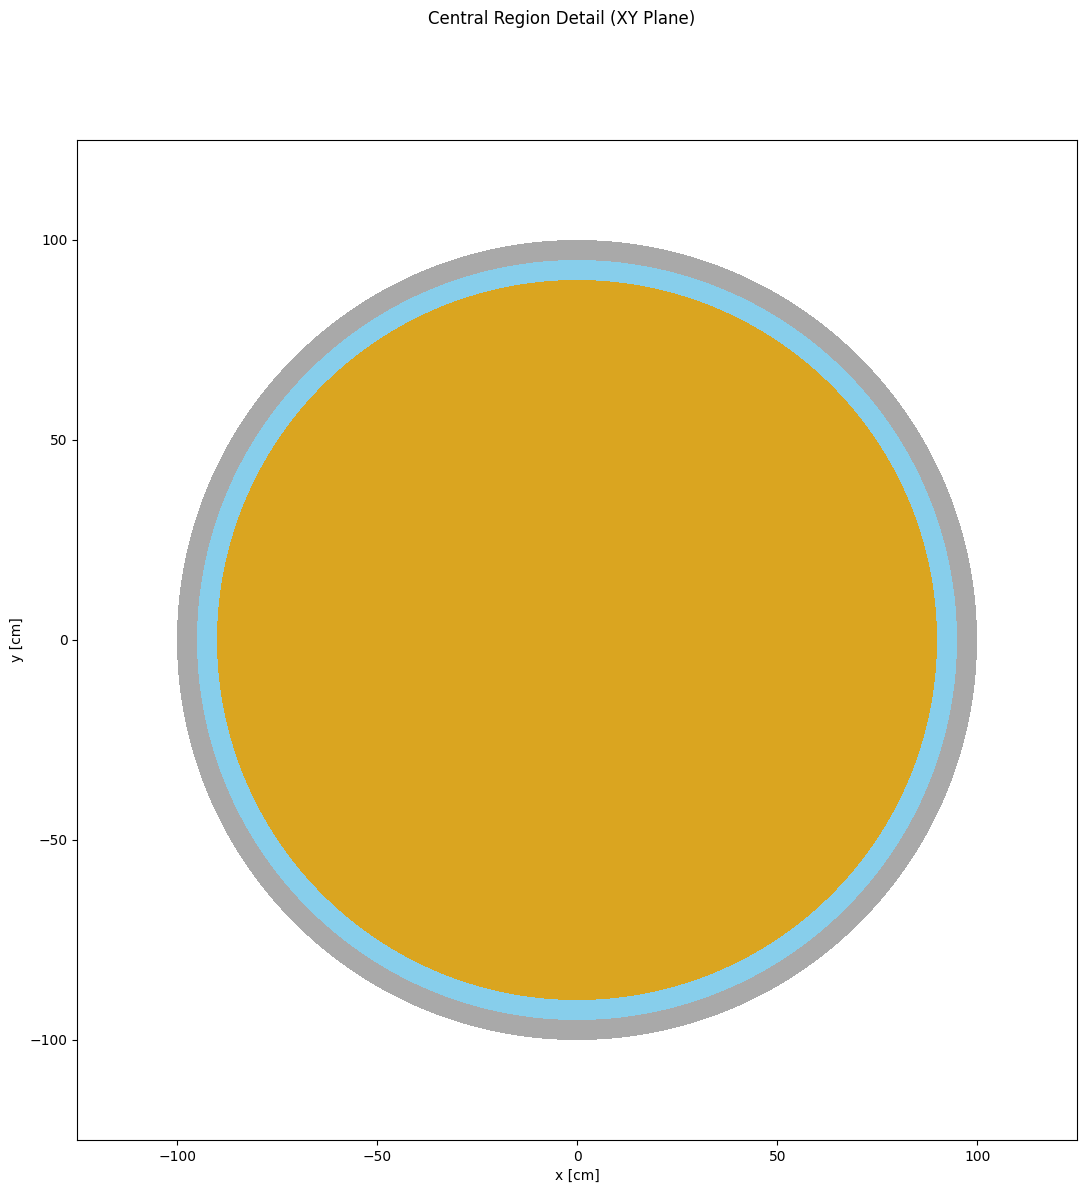

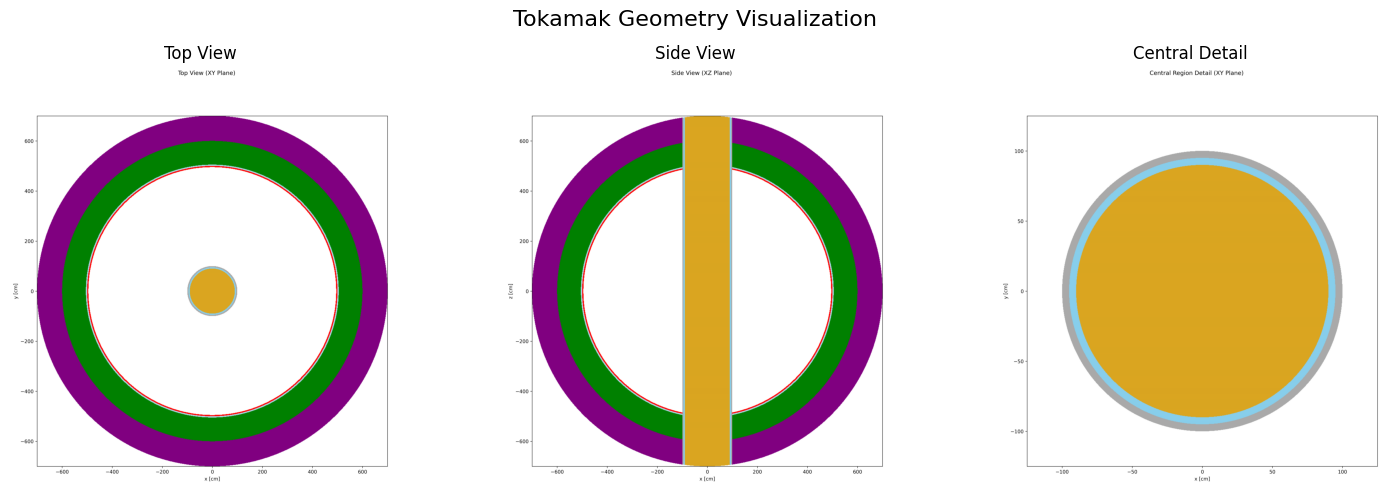

In [16]:

# First, let's create a color assignment dictionary for all our cells
# This will help distinguish different regions clearly
color_assignment = {
    central_column_cell: 'goldenrod',        # Conductor in gold
    central_column_coolant_cell: 'skyblue',  # Coolant in light blue
    central_column_fw_cell: 'darkgray',      # First wall in gray
    inner_vessel_cell: 'white',              # Vessel region in white
    blanket_fw_cell: 'red',                  # Blanket first wall in red
    blanket_coolant_cell: 'lightblue',       # Blanket coolant in blue
    blanket_breeder_cell: 'green',           # Breeder in green
    blanket_reflector_cell: 'purple'         # Reflector in purple
}

# Create three different views of the geometry
# Top view (xy plane)
plot_xy = my_geometry.plot(
    basis='xy',
    colors=color_assignment,
    width=(1400., 1400.),
    pixels=(1000, 1000)
)
plot_xy.figure.suptitle('Top View (XY Plane)')
plot_xy.figure.savefig('tokamak_xy.png', dpi=300, bbox_inches='tight')

# Side view (xz plane)
plot_xz = my_geometry.plot(
    basis='xz',
    colors=color_assignment,
    width=(1400., 1400.),
    pixels=(1000, 1000)
)
plot_xz.figure.suptitle('Side View (XZ Plane)')
plot_xz.figure.savefig('tokamak_xz.png', dpi=300, bbox_inches='tight')

# Detailed view of the central region
plot_central = my_geometry.plot(
    basis='xy',
    colors=color_assignment,
    width=(250., 250.),
    pixels=(1000, 1000)
)
plot_central.figure.suptitle('Central Region Detail (XY Plane)')
plot_central.figure.savefig('tokamak_central.png', dpi=300, bbox_inches='tight')

# Display all three plots in a single figure
plt.figure(figsize=(15, 5))

# Load and display the saved images
plt.subplot(131)
img_xy = plt.imread('tokamak_xy.png')
plt.imshow(img_xy)
plt.title('Top View')
plt.axis('off')

plt.subplot(132)
img_xz = plt.imread('tokamak_xz.png')
plt.imshow(img_xz)
plt.title('Side View')
plt.axis('off')

plt.subplot(133)
img_central = plt.imread('tokamak_central.png')
plt.imshow(img_central)
plt.title('Central Detail')
plt.axis('off')

plt.suptitle('Tokamak Geometry Visualization', fontsize=16)
plt.tight_layout()
plt.show()


# Task 5 - plot the source location and energy

In [17]:
# initialises a new source object
my_source = openmc.IndependentSource()
# the distribution of radius is just a single value
radius = openmc.stats.Discrete([300], [1])
# the distribution of source z values is just a single value
z_values = openmc.stats.Discrete([0], [1])
# the distribution of source azimuthal angles values is a uniform distribution between 0 and 2 Pi
angle = openmc.stats.Uniform(a=0., b=2* 3.14159265359)
# this makes the ring source using the three distributions and a radius
my_source.space = openmc.stats.CylindricalIndependent(r=radius, phi=angle, z=z_values, origin=(0.0, 0.0, 0.0))
# sets the direction to isotropic
my_source.angle = openmc.stats.Isotropic()
# sets the energy distribution to a Muir distribution neutrons
my_source.energy = openmc.stats.muir(e0=14080000.0, m_rat=5.0, kt=20000.0)

my_settings = openmc.Settings()
my_settings.batches = 10
my_settings.inactive = 0
my_settings.particles = 500
my_settings.run_mode = 'fixed source'
my_settings.source = my_source

# plot the source term
# Plot the source energy distribution
plot_source_energy(my_source)

# Plot the source position distribution
plot_source_position(my_source)

# Task 7 - complete the tally scores and filters

In [246]:
cell_filter_breeder = openmc.CellFilter(blanket_breeder_cell)
tbr_tally = openmc.Tally(name='TBR')
tbr_tally.filters = [cell_filter_breeder]
tbr_tally.scores = ['(n,Xt)']  # Tritium production score

cell_filter_blanket_fw_coolant = openmc.CellFilter([
    blanket_breeder_cell,
    blanket_coolant_cell,
    blanket_fw_cell,
    central_column_coolant_cell,
    central_column_fw_cell,
])
blanket_heating_tally = openmc.Tally(name='heating')
blanket_heating_tally.filters = [cell_filter_blanket_fw_coolant]
blanket_heating_tally.scores = ['heating'] # Heating score

material_filter_conductor = openmc.MaterialFilter(mat_conductor)
conductor_damage_tally = openmc.Tally(name='conductor_damage')
conductor_damage_tally.filters = [material_filter_conductor]
conductor_damage_tally.scores = ['damage-energy'] # Damage energy score

my_tallies = openmc.Tallies([tbr_tally, blanket_heating_tally, conductor_damage_tally])

# Print the tallies to verify
for tally in my_tallies:
    print(tally)

Tally
	ID             =	115
	Name           =	TBR
	Filters        =	CellFilter
	Nuclides       =	
	Scores         =	['(n,Xt)']
	Estimator      =	None
	Multiply dens. =	True
Tally
	ID             =	116
	Name           =	heating
	Filters        =	CellFilter
	Nuclides       =	
	Scores         =	['heating']
	Estimator      =	None
	Multiply dens. =	True
Tally
	ID             =	117
	Name           =	conductor_damage
	Filters        =	MaterialFilter
	Nuclides       =	
	Scores         =	['damage-energy']
	Estimator      =	None
	Multiply dens. =	True


In [247]:
model = openmc.model.Model(my_geometry, my_materials, my_settings, my_tallies)

# removes the old output files
!rm *.h5 *.xml

sp_filename = model.run()

                                %%%%%%%%%%%%%%%
                           %%%%%%%%%%%%%%%%%%%%%%%%
                        %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                      %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                    %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                   %%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%
                                    %%%%%%%%%%%%%%%%%%%%%%%%
                                     %%%%%%%%%%%%%%%%%%%%%%%%
                 ###############      %%%%%%%%%%%%%%%%%%%%%%%%
                ##################     %%%%%%%%%%%%%%%%%%%%%%%
                ###################     %%%%%%%%%%%%%%%%%%%%%%%
                ####################     %%%%%%%%%%%%%%%%%%%%%%
                #####################     %%%%%%%%%%%%%%%%%%%%%
                ######################     %%%%%%%%%%%%%%%%%%%%
                #######################     %%%%%%%%%%%%%%%%%%
                 #######################     %%%%%%%%%%%%%%%%%
                 #####################

# Task 8 - complete the code to get the correct tally names

In [248]:
sp = openmc.StatePoint(sp_filename)

tbr_tally = sp.get_tally(name='TBR')

print(f'TBR={tbr_tally.mean.flatten()[0]} with standard deviation of {tbr_tally.std_dev.flatten()[0]}')

heating_tally = sp.get_tally(name='heating')
print(f'Heating={heating_tally.mean.flatten()[0]/1e6}MeV per source neutron with standard deviation of {heating_tally.std_dev.flatten()[0]}')

damage_tally = sp.get_tally(name='conductor_damage')
print(f'damage={damage_tally.mean.flatten()[0]} with standard deviation of {damage_tally.std_dev.flatten()[0]}')



TBR=1.5949374509423773 with standard deviation of 0.020423405876573365
Heating=11.819166731639115MeV per source neutron with standard deviation of 120415.3084022156
damage=39586.552059923844 with standard deviation of 1517.2603034225128
